In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [16]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [17]:
number_of_Water = 50
number_of_normal = 50

total_train = number_of_Water + number_of_normal

df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:number_of_Water]
df_water_test = df2.iloc[60:112]

df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df3.iloc[0:number_of_normal]
df_Normal_test = df3.iloc[50:98]

train = pd.concat([df_water_train,df_Normal_train],axis=0)
test = pd.concat([df_water_test,df_Normal_test],axis=0)

In [18]:
a = (train['Type 1']=='Water').values
a.shape

(100,)

In [19]:
y_heat=[]
for i in range(len(a)):
    if a[i]==True :
        y_heat.append(1)
    else :
        y_heat.append(0)

In [20]:
y_heat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

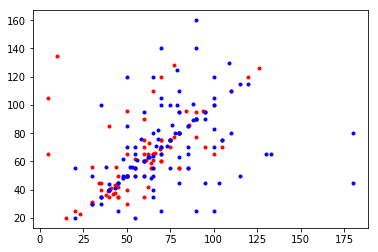

In [21]:
plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

#plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)

In [22]:
Defense_matrix_water = np.array(train['Defense'])
SpDef_matrix_water =   np.array(train['Sp. Def'])


train_data = np.vstack((Defense_matrix_water,SpDef_matrix_water)).T
train_data[0][0]

65

In [23]:
lr = 0.000001 # learning rate
iteration = 10000
w = [0.01754179, 0.00246004]
b = 12
W = np.mat(w)
W[0]




matrix([[0.01754179, 0.00246004]])

In [24]:
for j in range(iteration) :
    print(j)
    loss = 0
    W = np.mat(w)
    W_gra_1 = 0
    W_gra_2 = 0
    b_gra = 0
    
    for k in range(total_train):
        Z =(np.dot(W,train_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
    loss =  loss - ((y_heat[i]*np.log(f_w_b)) + ((1-y_heat[i])*np.log(1-f_w_b)))
    
               
    for i in range(total_train) :

        W_gra_1 = W_gra_1 + (f_w_b-y_heat[i])*train_data[i][0] 
        W_gra_2 = W_gra_2 + (f_w_b-y_heat[i])*train_data[i][1]
        b_gra = b_gra + (f_w_b-y_heat[i])
        #print(f_w_b)
    
    print('loss = ',loss)
    w[0] = w[0] - lr*W_gra_1
    w[1] = w[1] - lr*W_gra_2
    b = b -  lr*b_gra
    print(w)

0
loss =  12.800075960554851
[0.014772808504052921, -0.0005449417940878712]
1
loss =  12.569068146658553
[0.012003831816737122, -0.0035499188570220354]
2
loss =  12.338060900764095
[0.009234861187650524, -0.006554889959338329]
3
loss =  12.107054370630193
[0.006465898191108783, -0.009559853552086767]
4
loss =  11.87604874219577
[0.0036969448105199534, -0.01256480768381634]
5
loss =  11.645044249775394
[0.0009280035446797143, -0.015569749895992437]
6
loss =  11.414041188589547
[-0.0018409224583199229, -0.018574677091245696]
7
loss =  11.183039930488706
[-0.004609829232398036, -0.021579585367397444]
8
loss =  10.95204094406596
[-0.007378711780978037, -0.02458446980837687]
9
loss =  10.72104481953934
[-0.010147563809294826, -0.027589324220841323]
10
loss =  10.490052300566004
[-0.012916377387197189, -0.030594140802411678]
11
loss =  10.259064323908637
[-0.015685142524418896, -0.033598909723786756]
12
loss =  10.028082069710376
[-0.018453846635628494, -0.03660361860241234]
13
loss =  9.797

loss =  0.8342204886175144
[-0.11831483638759135, -0.1749835242288774]
156
loss =  0.8342204356012425
[-0.118173307678147, -0.17512489050684465]
157
loss =  0.8342203895143285
[-0.11803177883456537, -0.17526625665283588]
158
loss =  0.8342203494510881
[-0.1178902498743785, -0.17540762268410062]
159
loss =  0.8342203146242139
[-0.11774872081282702, -0.17554898861563395]
160
loss =  0.8342202843492974
[-0.1176071916631595, -0.17569035446047102]
161
loss =  0.8342202580313864
[-0.11746566243689294, -0.1758317202299432]
162
loss =  0.8342202351532911
[-0.11732413314403901, -0.17597308593390087]
163
loss =  0.8342202152654196
[-0.11718260379330085, -0.17611445158090697]
164
loss =  0.8342201979769427
[-0.11704107439224408, -0.1762558171784052]
165
loss =  0.8342201829481107
[-0.11689954494744545, -0.17639718273286634]
166
loss =  0.8342201698835848
[-0.11675801546462213, -0.17653854824991544]
167
loss =  0.8342201585266243
[-0.11661648594874403, -0.17667991373444236]
168
loss =  0.834220148

loss =  0.8342200829918766
[-0.09821762176678453, -0.19505740004206243]
298
loss =  0.8342200829918766
[-0.09807609203106031, -0.19519876531028543]
299
loss =  0.8342200829918766
[-0.09793456229533609, -0.19534013057850844]
300
loss =  0.8342200829918766
[-0.09779303255961187, -0.19548149584673144]
301
loss =  0.8342200829918766
[-0.09765150282388765, -0.19562286111495444]
302
loss =  0.8342200829918766
[-0.09750997308816343, -0.19576422638317745]
303
loss =  0.8342200829918756
[-0.09736844335243922, -0.19590559165140045]
304
loss =  0.8342200829918766
[-0.097226913616715, -0.19604695691962346]
305
loss =  0.8342200829918756
[-0.09708538388099078, -0.19618832218784646]
306
loss =  0.8342200829918766
[-0.09694385414526656, -0.19632968745606946]
307
loss =  0.8342200829918756
[-0.09680232440954234, -0.19647105272429247]
308
loss =  0.8342200829918756
[-0.09666079467381812, -0.19661241799251547]
309
loss =  0.8342200829918756
[-0.0965192649380939, -0.19675378326073847]
310
loss =  0.83422

loss =  0.8342200829918727
[-0.08137558321560232, -0.21187986696059988]
417
loss =  0.8342200829918727
[-0.0812340534798781, -0.21202123222882288]
418
loss =  0.8342200829918717
[-0.08109252374415386, -0.21216259749704588]
419
loss =  0.8342200829918727
[-0.08095099400842964, -0.2123039627652689]
420
loss =  0.8342200829918727
[-0.08080946427270543, -0.2124453280334919]
421
loss =  0.8342200829918727
[-0.0806679345369812, -0.2125866933017149]
422
loss =  0.8342200829918727
[-0.08052640480125699, -0.2127280585699379]
423
loss =  0.8342200829918727
[-0.08038487506553277, -0.2128694238381609]
424
loss =  0.8342200829918727
[-0.08024334532980855, -0.2130107891063839]
425
loss =  0.8342200829918727
[-0.08010181559408433, -0.2131521543746069]
426
loss =  0.8342200829918717
[-0.0799602858583601, -0.21329351964282992]
427
loss =  0.8342200829918727
[-0.07981875612263588, -0.21343488491105292]
428
loss =  0.8342200829918727
[-0.07967722638691166, -0.21357625017927592]
429
loss =  0.834220082991

loss =  0.8342200829918738
[-0.05986306338552056, -0.23336738773049645]
569
loss =  0.8342200829918738
[-0.05972153364979634, -0.23350875299871945]
570
loss =  0.8342200829918727
[-0.059580003914072116, -0.23365011826694246]
571
loss =  0.8342200829918727
[-0.05943847417834789, -0.23379148353516546]
572
loss =  0.8342200829918738
[-0.05929694444262367, -0.23393284880338847]
573
loss =  0.8342200829918738
[-0.05915541470689945, -0.23407421407161147]
574
loss =  0.8342200829918727
[-0.059013884971175226, -0.23421557933983447]
575
loss =  0.8342200829918738
[-0.05887235523545101, -0.23435694460805748]
576
loss =  0.8342200829918738
[-0.05873082549972679, -0.23449830987628048]
577
loss =  0.8342200829918738
[-0.05858929576400257, -0.23463967514450348]
578
loss =  0.8342200829918727
[-0.05844776602827834, -0.2347810404127265]
579
loss =  0.8342200829918727
[-0.05830623629255412, -0.2349224056809495]
580
loss =  0.8342200829918738
[-0.0581647065568299, -0.2350637709491725]
581
loss =  0.8342

700
loss =  0.8342200829918738
[-0.04118113826992332, -0.2520276031359329]
701
loss =  0.8342200829918727
[-0.04103960853419909, -0.2521689684041559]
702
loss =  0.8342200829918738
[-0.040898078798474874, -0.25231033367237893]
703
loss =  0.8342200829918738
[-0.040756549062750655, -0.25245169894060193]
704
loss =  0.8342200829918727
[-0.04061501932702643, -0.25259306420882494]
705
loss =  0.8342200829918727
[-0.0404734895913022, -0.25273442947704794]
706
loss =  0.8342200829918738
[-0.040331959855577984, -0.25287579474527094]
707
loss =  0.8342200829918738
[-0.040190430119853765, -0.25301716001349395]
708
loss =  0.8342200829918738
[-0.040048900384129546, -0.25315852528171695]
709
loss =  0.8342200829918727
[-0.03990737064840532, -0.25329989054993995]
710
loss =  0.8342200829918738
[-0.0397658409126811, -0.25344125581816296]
711
loss =  0.8342200829918738
[-0.03962431117695688, -0.25358262108638596]
712
loss =  0.8342200829918727
[-0.039482781441232656, -0.25372398635460897]
713
loss =

[-0.023631451040119794, -0.2695568963955854]
825
loss =  0.8342200829918738
[-0.02348992130439557, -0.2696982616638084]
826
loss =  0.8342200829918738
[-0.02334839156867135, -0.2698396269320314]
827
loss =  0.8342200829918738
[-0.023206861832947127, -0.2699809922002544]
828
loss =  0.8342200829918744
[-0.023065332097222908, -0.2701223574684774]
829
loss =  0.8342200829918738
[-0.022923802361498685, -0.2702637227367004]
830
loss =  0.8342200829918738
[-0.022782272625774463, -0.2704050880049234]
831
loss =  0.8342200829918738
[-0.02264074289005024, -0.2705464532731464]
832
loss =  0.8342200829918738
[-0.022499213154326018, -0.2706878185413694]
833
loss =  0.8342200829918738
[-0.022357683418601795, -0.2708291838095924]
834
loss =  0.8342200829918738
[-0.022216153682877573, -0.2709705490778154]
835
loss =  0.8342200829918738
[-0.02207462394715335, -0.27111191434603843]
836
loss =  0.8342200829918744
[-0.02193309421142913, -0.27125327961426143]
837
loss =  0.8342200829918738
[-0.02179156447

loss =  0.8342200829918738
[-0.0016943420028654212, -0.291468512970151]
980
loss =  0.8342200829918744
[-0.001552812267141202, -0.291609878238374]
981
loss =  0.8342200829918738
[-0.00141128253141698, -0.291751243506597]
982
loss =  0.8342200829918738
[-0.0012697527956927579, -0.29189260877482]
983
loss =  0.8342200829918738
[-0.0011282230599685358, -0.292033974043043]
984
loss =  0.8342200829918738
[-0.0009866933242443138, -0.292175339311266]
985
loss =  0.8342200829918738
[-0.0008451635885200917, -0.292316704579489]
986
loss =  0.8342200829918738
[-0.0007036338527958697, -0.292458069847712]
987
loss =  0.8342200829918738
[-0.0005621041170716476, -0.292599435115935]
988
loss =  0.8342200829918744
[-0.0004205743813474283, -0.292740800384158]
989
loss =  0.8342200829918738
[-0.0002790446456232063, -0.292882165652381]
990
loss =  0.8342200829918738
[-0.00013751490989898432, -0.293023530920604]
991
loss =  0.8342200829918738
[4.014825825237667e-06, -0.293164896188827]
992
loss =  0.834220

loss =  0.8342200829918744
[0.014298518133971644, -0.3074427882793504]
1093
loss =  0.8342200829918738
[0.014440047869695867, -0.3075841535475734]
1094
loss =  0.8342200829918738
[0.01458157760542009, -0.3077255188157964]
1095
loss =  0.8342200829918738
[0.014723107341144312, -0.3078668840840194]
1096
loss =  0.8342200829918738
[0.014864637076868534, -0.3080082493522424]
1097
loss =  0.8342200829918738
[0.015006166812592757, -0.3081496146204654]
1098
loss =  0.8342200829918738
[0.015147696548316979, -0.3082909798886884]
1099
loss =  0.8342200829918744
[0.015289226284041198, -0.3084323451569114]
1100
loss =  0.8342200829918744
[0.015430756019765417, -0.30857371042513443]
1101
loss =  0.8342200829918738
[0.01557228575548964, -0.30871507569335743]
1102
loss =  0.8342200829918738
[0.01571381549121386, -0.30885644096158044]
1103
loss =  0.8342200829918738
[0.015855345226938083, -0.30899780622980344]
1104
loss =  0.8342200829918738
[0.015996874962662305, -0.30913917149802644]
1105
loss =  0.

loss =  0.8342200829918738
[0.035103389285432225, -0.32822348270813195]
1240
loss =  0.8342200829918727
[0.03524491902115645, -0.32836484797635496]
1241
loss =  0.8342200829918727
[0.03538644875688068, -0.32850621324457796]
1242
loss =  0.8342200829918738
[0.035527978492604896, -0.32864757851280096]
1243
loss =  0.8342200829918738
[0.035669508228329115, -0.32878894378102397]
1244
loss =  0.8342200829918738
[0.035811037964053334, -0.32893030904924697]
1245
loss =  0.8342200829918727
[0.03595256769977756, -0.32907167431747]
1246
loss =  0.8342200829918738
[0.03609409743550178, -0.329213039585693]
1247
loss =  0.8342200829918738
[0.036235627171226, -0.329354404853916]
1248
loss =  0.8342200829918727
[0.036377156906950224, -0.329495770122139]
1249
loss =  0.8342200829918727
[0.03651868664267445, -0.329637135390362]
1250
loss =  0.8342200829918738
[0.03666021637839867, -0.329778500658585]
1251
loss =  0.8342200829918738
[0.03680174611412289, -0.329919865926808]
1252
loss =  0.83422008299187

loss =  0.8342200829918738
[0.054351433343926385, -0.34744915918646047]
1376
loss =  0.8342200829918727
[0.05449296307965061, -0.34759052445468347]
1377
loss =  0.8342200829918727
[0.05463449281537484, -0.3477318897229065]
1378
loss =  0.8342200829918738
[0.054776022551099056, -0.3478732549911295]
1379
loss =  0.8342200829918738
[0.054917552286823275, -0.3480146202593525]
1380
loss =  0.8342200829918738
[0.055059082022547494, -0.3481559855275755]
1381
loss =  0.8342200829918727
[0.05520061175827172, -0.3482973507957985]
1382
loss =  0.8342200829918738
[0.05534214149399594, -0.3484387160640215]
1383
loss =  0.8342200829918738
[0.05548367122972016, -0.3485800813322445]
1384
loss =  0.8342200829918727
[0.055625200965444384, -0.3487214466004675]
1385
loss =  0.8342200829918727
[0.05576673070116861, -0.3488628118686905]
1386
loss =  0.8342200829918738
[0.05590826043689283, -0.3490041771369135]
1387
loss =  0.8342200829918738
[0.05604979017261705, -0.3491455424051365]
1388
loss =  0.83422008

loss =  0.8342200829918717
[0.07558089370255962, -0.36865394941991103]
1526
loss =  0.8342200829918727
[0.07572242343828384, -0.36879531468813403]
1527
loss =  0.8342200829918727
[0.07586395317400806, -0.36893667995635704]
1528
loss =  0.8342200829918717
[0.07600548290973229, -0.36907804522458004]
1529
loss =  0.8342200829918727
[0.07614701264545651, -0.36921941049280305]
1530
loss =  0.8342200829918727
[0.07628854238118073, -0.36936077576102605]
1531
loss =  0.8342200829918727
[0.07643007211690495, -0.36950214102924905]
1532
loss =  0.8342200829918727
[0.07657160185262916, -0.36964350629747206]
1533
loss =  0.8342200829918727
[0.07671313158835338, -0.36978487156569506]
1534
loss =  0.8342200829918727
[0.0768546613240776, -0.36992623683391807]
1535
loss =  0.8342200829918727
[0.07699619105980182, -0.37006760210214107]
1536
loss =  0.8342200829918717
[0.07713772079552605, -0.3702089673703641]
1537
loss =  0.8342200829918727
[0.07727925053125027, -0.3703503326385871]
1538
loss =  0.83422

loss =  0.8342200829918717
[0.09143222410367245, -0.38448685946088745]
1638
loss =  0.8342200829918727
[0.09157375383939667, -0.38462822472911046]
1639
loss =  0.8342200829918727
[0.09171528357512089, -0.38476958999733346]
1640
loss =  0.8342200829918717
[0.09185681331084512, -0.38491095526555646]
1641
loss =  0.8342200829918727
[0.09199834304656934, -0.38505232053377947]
1642
loss =  0.8342200829918727
[0.09213987278229356, -0.3851936858020025]
1643
loss =  0.8342200829918727
[0.09228140251801778, -0.3853350510702255]
1644
loss =  0.8342200829918727
[0.092422932253742, -0.3854764163384485]
1645
loss =  0.8342200829918717
[0.09256446198946623, -0.3856177816066715]
1646
loss =  0.8342200829918727
[0.09270599172519045, -0.3857591468748945]
1647
loss =  0.8342200829918727
[0.09284752146091467, -0.3859005121431175]
1648
loss =  0.8342200829918717
[0.0929890511966389, -0.3860418774113405]
1649
loss =  0.8342200829918727
[0.09313058093236312, -0.3861832426795635]
1650
loss =  0.8342200829918

loss =  0.8342200829918727
[0.1125201547265815, -0.405550284426115]
1787
loss =  0.8342200829918717
[0.11266168446230573, -0.405691649694338]
1788
loss =  0.8342200829918727
[0.11280321419802995, -0.405833014962561]
1789
loss =  0.8342200829918727
[0.11294474393375417, -0.405974380230784]
1790
loss =  0.8342200829918717
[0.1130862736694784, -0.40611574549900703]
1791
loss =  0.8342200829918727
[0.11322780340520262, -0.40625711076723003]
1792
loss =  0.8342200829918727
[0.11336933314092684, -0.40639847603545304]
1793
loss =  0.8342200829918738
[0.11351086287665106, -0.40653984130367604]
1794
loss =  0.8342200829918727
[0.11365239261237528, -0.40668120657189905]
1795
loss =  0.8342200829918717
[0.11379392234809951, -0.40682257184012205]
1796
loss =  0.8342200829918727
[0.11393545208382373, -0.40696393710834505]
1797
loss =  0.8342200829918727
[0.11407698181954795, -0.40710530237656806]
1798
loss =  0.8342200829918738
[0.11421851155527217, -0.40724666764479106]
1799
loss =  0.834220082991

loss =  0.8342200829918756
[0.13134360957790311, -0.4243518650997745]
1920
loss =  0.8342200829918744
[0.13148513931362735, -0.4244932303679975]
1921
loss =  0.8342200829918766
[0.13162666904935155, -0.4246345956362205]
1922
loss =  0.8342200829918744
[0.13176819878507579, -0.42477596090444353]
1923
loss =  0.8342200829918744
[0.13190972852080002, -0.42491732617266653]
1924
loss =  0.8342200829918756
[0.13205125825652422, -0.42505869144088954]
1925
loss =  0.8342200829918744
[0.13219278799224846, -0.42520005670911254]
1926
loss =  0.8342200829918766
[0.13233431772797266, -0.42534142197733554]
1927
loss =  0.8342200829918744
[0.1324758474636969, -0.42548278724555855]
1928
loss =  0.8342200829918744
[0.13261737719942113, -0.42562415251378155]
1929
loss =  0.8342200829918766
[0.13275890693514533, -0.42576551778200455]
1930
loss =  0.8342200829918744
[0.13290043667086957, -0.42590688305022756]
1931
loss =  0.8342200829918744
[0.1330419664065938, -0.42604824831845056]
1932
loss =  0.8342200

loss =  0.8342200829918744
[0.15073318337212152, -0.44371890684632603]
2057
loss =  0.8342200829918766
[0.15087471310784573, -0.44386027211454904]
2058
loss =  0.8342200829918744
[0.15101624284356996, -0.44400163738277204]
2059
loss =  0.8342200829918744
[0.1511577725792942, -0.44414300265099504]
2060
loss =  0.8342200829918766
[0.1512993023150184, -0.44428436791921805]
2061
loss =  0.8342200829918744
[0.15144083205074263, -0.44442573318744105]
2062
loss =  0.8342200829918744
[0.15158236178646686, -0.44456709845566406]
2063
loss =  0.8342200829918766
[0.15172389152219107, -0.44470846372388706]
2064
loss =  0.8342200829918744
[0.1518654212579153, -0.44484982899211006]
2065
loss =  0.8342200829918766
[0.1520069509936395, -0.44499119426033307]
2066
loss =  0.8342200829918744
[0.15214848072936374, -0.44513255952855607]
2067
loss =  0.8342200829918744
[0.15229001046508797, -0.4452739247967791]
2068
loss =  0.8342200829918766
[0.15243154020081218, -0.4454152900650021]
2069
loss =  0.83422008

loss =  0.8342200829918744
[0.17323641135227277, -0.46619598449378363]
2216
loss =  0.8342200829918744
[0.173377941087997, -0.46633734976200664]
2217
loss =  0.8342200829918766
[0.1735194708237212, -0.46647871503022964]
2218
loss =  0.8342200829918744
[0.17366100055944544, -0.46662008029845264]
2219
loss =  0.8342200829918744
[0.17380253029516968, -0.46676144556667565]
2220
loss =  0.8342200829918766
[0.17394406003089388, -0.46690281083489865]
2221
loss =  0.8342200829918744
[0.17408558976661812, -0.46704417610312166]
2222
loss =  0.8342200829918744
[0.17422711950234235, -0.46718554137134466]
2223
loss =  0.8342200829918766
[0.17436864923806655, -0.46732690663956766]
2224
loss =  0.8342200829918744
[0.17451017897379079, -0.46746827190779067]
2225
loss =  0.8342200829918766
[0.174651708709515, -0.46760963717601367]
2226
loss =  0.8342200829918744
[0.17479323844523922, -0.4677510024442367]
2227
loss =  0.8342200829918744
[0.17493476818096346, -0.4678923677124597]
2228
loss =  0.834220082

loss =  0.8342200829918744
[0.19220139593931848, -0.48513893043566614]
2350
loss =  0.8342200829918744
[0.19234292567504271, -0.48528029570388914]
2351
loss =  0.8342200829918756
[0.19248445541076692, -0.48542166097211215]
2352
loss =  0.8342200829918744
[0.19262598514649115, -0.48556302624033515]
2353
loss =  0.8342200829918756
[0.19276751488221536, -0.48570439150855815]
2354
loss =  0.8342200829918744
[0.1929090446179396, -0.48584575677678116]
2355
loss =  0.8342200829918744
[0.19305057435366382, -0.48598712204500416]
2356
loss =  0.8342200829918756
[0.19319210408938803, -0.48612848731322716]
2357
loss =  0.8342200829918744
[0.19333363382511226, -0.48626985258145017]
2358
loss =  0.8342200829918766
[0.19347516356083647, -0.48641121784967317]
2359
loss =  0.8342200829918744
[0.1936166932965607, -0.4865525831178962]
2360
loss =  0.8342200829918744
[0.19375822303228493, -0.4866939483861192]
2361
loss =  0.8342200829918766
[0.19389975276800914, -0.4868353136543422]
2362
loss =  0.8342200

loss =  0.8342200829918727
[0.2166860402196087, -0.5095951218382456]
2523
loss =  0.8342200829918744
[0.21682756995533292, -0.5097364871064686]
2524
loss =  0.8342200829918766
[0.21696909969105713, -0.5098778523746916]
2525
loss =  0.8342200829918744
[0.21711062942678136, -0.5100192176429146]
2526
loss =  0.8342200829918766
[0.21725215916250556, -0.5101605829111376]
2527
loss =  0.8342200829918756
[0.21739368889822977, -0.5103019481793607]
2528
loss =  0.8342200829918727
[0.217535218633954, -0.5104433134475836]
2529
loss =  0.8342200829918738
[0.21767674836967824, -0.5105846787158066]
2530
loss =  0.8342200829918756
[0.21781827810540244, -0.5107260439840297]
2531
loss =  0.8342200829918744
[0.21795980784112667, -0.5108674092522526]
2532
loss =  0.8342200829918756
[0.21810133757685088, -0.5110087745204757]
2533
loss =  0.8342200829918744
[0.2182428673125751, -0.5111501397886986]
2534
loss =  0.8342200829918756
[0.21838439704829932, -0.5112915050569217]
2535
loss =  0.8342200829918744
[0

loss =  0.8342200829918744
[0.2348018463923088, -0.5276898761707898]
2651
loss =  0.8342200829918766
[0.234943376128033, -0.5278312414390128]
2652
loss =  0.8342200829918756
[0.23508490586375722, -0.5279726067072359]
2653
loss =  0.8342200829918744
[0.23522643559948145, -0.5281139719754588]
2654
loss =  0.8342200829918756
[0.23536796533520565, -0.5282553372436819]
2655
loss =  0.8342200829918727
[0.2355094950709299, -0.5283967025119048]
2656
loss =  0.8342200829918744
[0.23565102480665412, -0.5285380677801278]
2657
loss =  0.8342200829918756
[0.23579255454237832, -0.5286794330483509]
2658
loss =  0.8342200829918744
[0.23593408427810256, -0.5288207983165738]
2659
loss =  0.8342200829918756
[0.23607561401382676, -0.5289621635847969]
2660
loss =  0.8342200829918744
[0.236217143749551, -0.5291035288530198]
2661
loss =  0.8342200829918766
[0.2363586734852752, -0.5292448941212429]
2662
loss =  0.8342200829918738
[0.23650020322099943, -0.5293862593894658]
2663
loss =  0.8342200829918744
[0.23

loss =  0.8342200829918756
[0.25475753912942417, -0.5476223789902335]
2792
loss =  0.8342200829918744
[0.2548990688651484, -0.5477637442584564]
2793
loss =  0.8342200829918766
[0.25504059860087264, -0.5479051095266795]
2794
loss =  0.8342200829918756
[0.25518212833659687, -0.5480464747949025]
2795
loss =  0.8342200829918756
[0.2553236580723211, -0.5481878400631256]
2796
loss =  0.8342200829918727
[0.25546518780804534, -0.5483292053313485]
2797
loss =  0.8342200829918744
[0.25560671754376957, -0.5484705705995715]
2798
loss =  0.8342200829918756
[0.2557482472794938, -0.5486119358677946]
2799
loss =  0.8342200829918756
[0.25588977701521803, -0.5487533011360176]
2800
loss =  0.8342200829918744
[0.25603130675094227, -0.5488946664042406]
2801
loss =  0.8342200829918766
[0.2561728364866665, -0.5490360316724636]
2802
loss =  0.8342200829918738
[0.25631436622239073, -0.5491773969406866]
2803
loss =  0.8342200829918756
[0.25645589595811497, -0.5493187622089096]
2804
loss =  0.8342200829918744
[0

loss =  0.8342200829918756
[0.2738640534521956, -0.5667066902003405]
2927
loss =  0.8342200829918756
[0.27400558318791984, -0.5668480554685635]
2928
loss =  0.8342200829918744
[0.2741471129236441, -0.5669894207367865]
2929
loss =  0.8342200829918766
[0.2742886426593683, -0.5671307860050095]
2930
loss =  0.8342200829918738
[0.27443017239509254, -0.5672721512732325]
2931
loss =  0.8342200829918756
[0.2745717021308168, -0.5674135165414556]
2932
loss =  0.8342200829918744
[0.274713231866541, -0.5675548818096785]
2933
loss =  0.8342200829918766
[0.27485476160226524, -0.5676962470779016]
2934
loss =  0.8342200829918756
[0.2749962913379895, -0.5678376123461246]
2935
loss =  0.8342200829918738
[0.2751378210737137, -0.5679789776143476]
2936
loss =  0.8342200829918744
[0.27527935080943794, -0.5681203428825705]
2937
loss =  0.8342200829918766
[0.27542088054516217, -0.5682617081507936]
2938
loss =  0.8342200829918756
[0.2755624102808864, -0.5684030734190166]
2939
loss =  0.8342200829918756
[0.2757

loss =  0.8342200829918766
[0.29297056777496705, -0.5857910014104475]
3062
loss =  0.8342200829918756
[0.2931120975106913, -0.5859323666786705]
3063
loss =  0.8342200829918738
[0.2932536272464155, -0.5860737319468935]
3064
loss =  0.8342200829918744
[0.29339515698213975, -0.5862150972151164]
3065
loss =  0.8342200829918766
[0.293536686717864, -0.5863564624833395]
3066
loss =  0.8342200829918756
[0.2936782164535882, -0.5864978277515626]
3067
loss =  0.8342200829918756
[0.29381974618931245, -0.5866391930197856]
3068
loss =  0.8342200829918727
[0.2939612759250367, -0.5867805582880086]
3069
loss =  0.8342200829918744
[0.2941028056607609, -0.5869219235562315]
3070
loss =  0.8342200829918756
[0.29424433539648515, -0.5870632888244546]
3071
loss =  0.8342200829918756
[0.2943858651322094, -0.5872046540926776]
3072
loss =  0.8342200829918744
[0.2945273948679336, -0.5873460193609006]
3073
loss =  0.8342200829918766
[0.29466892460365784, -0.5874873846291236]
3074
loss =  0.8342200829918756
[0.2948

3195
loss =  0.8342200829918756
[0.31193555236201426, -0.6047339473523315]
3196
loss =  0.8342200829918727
[0.3120770820977385, -0.6048753126205545]
3197
loss =  0.8342200829918744
[0.3122186118334627, -0.6050166778887774]
3198
loss =  0.8342200829918756
[0.31236014156918696, -0.6051580431570005]
3199
loss =  0.8342200829918756
[0.3125016713049112, -0.6052994084252236]
3200
loss =  0.8342200829918744
[0.3126432010406354, -0.6054407736934465]
3201
loss =  0.8342200829918766
[0.31278473077635965, -0.6055821389616696]
3202
loss =  0.8342200829918738
[0.3129262605120839, -0.6057235042298925]
3203
loss =  0.8342200829918756
[0.3130677902478081, -0.6058648694981156]
3204
loss =  0.8342200829918744
[0.31320931998353235, -0.6060062347663385]
3205
loss =  0.8342200829918766
[0.3133508497192566, -0.6061476000345616]
3206
loss =  0.8342200829918756
[0.3134923794549808, -0.6062889653027846]
3207
loss =  0.8342200829918756
[0.31363390919070505, -0.6064303305710077]
3208
loss =  0.8342200829918744
[

loss =  0.8342200829918738
[0.3328819532492007, -0.6256560070493377]
3344
loss =  0.8342200829918744
[0.33302348298492496, -0.6257973723175606]
3345
loss =  0.8342200829918766
[0.3331650127206492, -0.6259387375857837]
3346
loss =  0.8342200829918756
[0.3333065424563734, -0.6260801028540067]
3347
loss =  0.8342200829918756
[0.33344807219209766, -0.6262214681222298]
3348
loss =  0.8342200829918727
[0.3335896019278219, -0.6263628333904527]
3349
loss =  0.8342200829918744
[0.3337311316635461, -0.6265041986586757]
3350
loss =  0.8342200829918756
[0.33387266139927035, -0.6266455639268987]
3351
loss =  0.8342200829918756
[0.3340141911349946, -0.6267869291951218]
3352
loss =  0.8342200829918744
[0.3341557208707188, -0.6269282944633447]
3353
loss =  0.8342200829918766
[0.33429725060644305, -0.6270696597315678]
3354
loss =  0.8342200829918756
[0.3344387803421673, -0.6272110249997909]
3355
loss =  0.8342200829918756
[0.3345803100778915, -0.6273523902680139]
3356
loss =  0.8342200829918727
[0.3347

loss =  0.8342200829918756
[0.35269611625059333, -0.6454471446005597]
3484
loss =  0.8342200829918744
[0.35283764598631756, -0.6455885098687827]
3485
loss =  0.8342200829918766
[0.3529791757220418, -0.6457298751370057]
3486
loss =  0.8342200829918756
[0.353120705457766, -0.6458712404052288]
3487
loss =  0.8342200829918756
[0.35326223519349026, -0.6460126056734519]
3488
loss =  0.8342200829918744
[0.3534037649292145, -0.6461539709416748]
3489
loss =  0.8342200829918766
[0.3535452946649387, -0.6462953362098979]
3490
loss =  0.8342200829918738
[0.35368682440066296, -0.6464367014781208]
3491
loss =  0.8342200829918756
[0.3538283541363872, -0.6465780667463439]
3492
loss =  0.8342200829918744
[0.3539698838721114, -0.6467194320145668]
3493
loss =  0.8342200829918766
[0.35411141360783566, -0.6468607972827899]
3494
loss =  0.8342200829918756
[0.3542529433435599, -0.647002162551013]
3495
loss =  0.8342200829918738
[0.3543944730792841, -0.6471435278192359]
3496
loss =  0.8342200829918744
[0.35453

loss =  0.8342200829918766
[0.3784545281524037, -0.6711756234171484]
3666
loss =  0.8342200829918756
[0.37859605788812795, -0.6713169886853715]
3667
loss =  0.8342200829918756
[0.3787375876238522, -0.6714583539535945]
3668
loss =  0.8342200829918727
[0.3788791173595764, -0.6715997192218175]
3669
loss =  0.8342200829918744
[0.37902064709530064, -0.6717410844900404]
3670
loss =  0.8342200829918756
[0.3791621768310249, -0.6718824497582635]
3671
loss =  0.8342200829918756
[0.3793037065667491, -0.6720238150264866]
3672
loss =  0.8342200829918744
[0.37944523630247334, -0.6721651802947095]
3673
loss =  0.8342200829918766
[0.3795867660381976, -0.6723065455629326]
3674
loss =  0.8342200829918756
[0.3797282957739218, -0.6724479108311556]
3675
loss =  0.8342200829918756
[0.37986982550964604, -0.6725892760993787]
3676
loss =  0.8342200829918727
[0.3800113552453703, -0.6727306413676016]
3677
loss =  0.8342200829918744
[0.3801528849810945, -0.6728720066358246]
3678
loss =  0.8342200829918756
[0.3802

loss =  0.8342200829918756
[0.39841022088952055, -0.6911081262365936]
3807
loss =  0.8342200829918756
[0.3985517506252448, -0.6912494915048166]
3808
loss =  0.8342200829918744
[0.398693280360969, -0.6913908567730396]
3809
loss =  0.8342200829918766
[0.39883481009669325, -0.6915322220412626]
3810
loss =  0.8342200829918738
[0.3989763398324175, -0.6916735873094856]
3811
loss =  0.8342200829918756
[0.3991178695681417, -0.6918149525777086]
3812
loss =  0.8342200829918744
[0.39925939930386595, -0.6919563178459316]
3813
loss =  0.8342200829918766
[0.3994009290395902, -0.6920976831141546]
3814
loss =  0.8342200829918756
[0.3995424587753144, -0.6922390483823777]
3815
loss =  0.8342200829918738
[0.39968398851103865, -0.6923804136506007]
3816
loss =  0.8342200829918744
[0.3998255182467629, -0.6925217789188236]
3817
loss =  0.8342200829918766
[0.3999670479824871, -0.6926631441870467]
3818
loss =  0.8342200829918756
[0.40010857771821134, -0.6928045094552697]
3819
loss =  0.8342200829918744
[0.4002

[0.41779979468374046, -0.7104751679831466]
3944
loss =  0.8342200829918744
[0.4179413244194647, -0.7106165332513695]
3945
loss =  0.8342200829918766
[0.4180828541551889, -0.7107578985195926]
3946
loss =  0.8342200829918766
[0.41822438389091315, -0.7108992637878156]
3947
loss =  0.8342200829918744
[0.4183659136266374, -0.7110406290560386]
3948
loss =  0.8342200829918766
[0.4185074433623616, -0.7111819943242617]
3949
loss =  0.8342200829918744
[0.41864897309808585, -0.7113233595924846]
3950
loss =  0.8342200829918766
[0.4187905028338101, -0.7114647248607077]
3951
loss =  0.8342200829918744
[0.4189320325695343, -0.7116060901289306]
3952
loss =  0.8342200829918766
[0.41907356230525855, -0.7117474553971537]
3953
loss =  0.8342200829918766
[0.4192150920409828, -0.7118888206653767]
3954
loss =  0.8342200829918766
[0.419356621776707, -0.7120301859335998]
3955
loss =  0.8342200829918744
[0.41949815151243125, -0.7121715512018227]
3956
loss =  0.8342200829918766
[0.4196396812481555, -0.7123129164

loss =  0.8342200829918744
[0.4364817197993392, -0.7291353833885845]
4076
loss =  0.8342200829918766
[0.43662324953506343, -0.7292767486568076]
4077
loss =  0.8342200829918744
[0.43676477927078766, -0.7294181139250305]
4078
loss =  0.8342200829918766
[0.4369063090065119, -0.7295594791932536]
4079
loss =  0.8342200829918744
[0.4370478387422361, -0.7297008444614765]
4080
loss =  0.8342200829918766
[0.43718936847796036, -0.7298422097296996]
4081
loss =  0.8342200829918766
[0.4373308982136846, -0.7299835749979227]
4082
loss =  0.8342200829918744
[0.4374724279494088, -0.7301249402661456]
4083
loss =  0.8342200829918744
[0.43761395768513306, -0.7302663055343686]
4084
loss =  0.8342200829918766
[0.4377554874208573, -0.7304076708025916]
4085
loss =  0.8342200829918766
[0.4378970171565815, -0.7305490360708147]
4086
loss =  0.8342200829918766
[0.43803854689230576, -0.7306904013390377]
4087
loss =  0.8342200829918744
[0.43818007662803, -0.7308317666072607]
4088
loss =  0.8342200829918766
[0.43832

loss =  0.8342200829918766
[0.4558712935935591, -0.7485024251351375]
4213
loss =  0.8342200829918766
[0.45601282332928333, -0.7486437904033606]
4214
loss =  0.8342200829918766
[0.45615435306500757, -0.7487851556715837]
4215
loss =  0.8342200829918727
[0.4562958828007318, -0.7489265209398066]
4216
loss =  0.8342200829918744
[0.45643741253645603, -0.7490678862080296]
4217
loss =  0.8342200829918766
[0.45657894227218027, -0.7492092514762526]
4218
loss =  0.8342200829918766
[0.4567204720079045, -0.7493506167444757]
4219
loss =  0.8342200829918744
[0.45686200174362873, -0.7494919820126986]
4220
loss =  0.8342200829918766
[0.45700353147935296, -0.7496333472809217]
4221
loss =  0.8342200829918766
[0.4571450612150772, -0.7497747125491447]
4222
loss =  0.8342200829918766
[0.45728659095080143, -0.7499160778173678]
4223
loss =  0.8342200829918727
[0.45742812068652566, -0.7500574430855907]
4224
loss =  0.8342200829918744
[0.4575696504222499, -0.7501988083538137]
4225
loss =  0.8342200829918766
[0.

loss =  0.8342200829918744
[0.4755439268592275, -0.7681521974181366]
4352
loss =  0.8342200829918766
[0.4756854565949517, -0.7682935626863596]
4353
loss =  0.8342200829918766
[0.47582698633067594, -0.7684349279545827]
4354
loss =  0.8342200829918766
[0.47596851606640017, -0.7685762932228057]
4355
loss =  0.8342200829918744
[0.4761100458021244, -0.7687176584910287]
4356
loss =  0.8342200829918766
[0.47625157553784864, -0.7688590237592517]
4357
loss =  0.8342200829918744
[0.47639310527357287, -0.7690003890274747]
4358
loss =  0.8342200829918766
[0.4765346350092971, -0.7691417542956978]
4359
loss =  0.8342200829918744
[0.47667616474502134, -0.7692831195639207]
4360
loss =  0.8342200829918766
[0.47681769448074557, -0.7694244848321438]
4361
loss =  0.8342200829918766
[0.4769592242164698, -0.7695658501003668]
4362
loss =  0.8342200829918744
[0.47710075395219403, -0.7697072153685898]
4363
loss =  0.8342200829918744
[0.47724228368791827, -0.7698485806368127]
4364
loss =  0.8342200829918766
[0.

loss =  0.8342200829918766
[0.49181984646751425, -0.7844092032637834]
4467
loss =  0.8342200829918744
[0.4919613762032385, -0.7845505685320063]
4468
loss =  0.8342200829918766
[0.4921029059389627, -0.7846919338002294]
4469
loss =  0.8342200829918744
[0.49224443567468695, -0.7848332990684523]
4470
loss =  0.8342200829918766
[0.4923859654104112, -0.7849746643366754]
4471
loss =  0.8342200829918744
[0.4925274951461354, -0.7851160296048983]
4472
loss =  0.8342200829918766
[0.49266902488185965, -0.7852573948731214]
4473
loss =  0.8342200829918766
[0.4928105546175839, -0.7853987601413445]
4474
loss =  0.8342200829918766
[0.4929520843533081, -0.7855401254095675]
4475
loss =  0.8342200829918744
[0.49309361408903235, -0.7856814906777905]
4476
loss =  0.8342200829918766
[0.4932351438247566, -0.7858228559460135]
4477
loss =  0.8342200829918744
[0.4933766735604808, -0.7859642212142365]
4478
loss =  0.8342200829918766
[0.49351820329620505, -0.7861055864824595]
4479
loss =  0.8342200829918744
[0.493

loss =  0.8342200829918766
[0.5092280039615948, -0.8017971312552141]
4590
loss =  0.8342200829918744
[0.5093695336973191, -0.8019384965234371]
4591
loss =  0.8342200829918766
[0.5095110634330433, -0.8020798617916601]
4592
loss =  0.8342200829918786
[0.5096525931687675, -0.8022212270598832]
4593
loss =  0.8342200829918744
[0.5097941229044918, -0.8023625923281061]
4594
loss =  0.8342200829918766
[0.509935652640216, -0.8025039575963292]
4595
loss =  0.8342200829918744
[0.5100771823759402, -0.8026453228645521]
4596
loss =  0.8342200829918744
[0.5102187121116645, -0.8027866881327751]
4597
loss =  0.8342200829918766
[0.5103602418473887, -0.8029280534009982]
4598
loss =  0.8342200829918786
[0.5105017715831129, -0.8030694186692212]
4599
loss =  0.8342200829918766
[0.5106433013188372, -0.8032107839374443]
4600
loss =  0.8342200829918744
[0.5107848310545614, -0.8033521492056672]
4601
loss =  0.8342200829918786
[0.5109263607902856, -0.8034935144738903]
4602
loss =  0.8342200829918766
[0.511067890

loss =  0.8342200829918786
[0.5274853398700209, -0.820033250855983]
4719
loss =  0.8342200829918766
[0.5276268696057451, -0.8201746161242061]
4720
loss =  0.8342200829918786
[0.5277683993414694, -0.8203159813924291]
4721
loss =  0.8342200829918744
[0.5279099290771936, -0.8204573466606521]
4722
loss =  0.8342200829918766
[0.5280514588129178, -0.8205987119288751]
4723
loss =  0.8342200829918744
[0.528192988548642, -0.8207400771970981]
4724
loss =  0.8342200829918744
[0.5283345182843663, -0.820881442465321]
4725
loss =  0.8342200829918766
[0.5284760480200905, -0.8210228077335441]
4726
loss =  0.8342200829918786
[0.5286175777558147, -0.8211641730017671]
4727
loss =  0.8342200829918766
[0.528759107491539, -0.8213055382699902]
4728
loss =  0.8342200829918744
[0.5289006372272632, -0.8214469035382131]
4729
loss =  0.8342200829918744
[0.5290421669629874, -0.8215882688064361]
4730
loss =  0.8342200829918766
[0.5291836966987117, -0.8217296340746592]
4731
loss =  0.8342200829918786
[0.529325226434

loss =  0.8342200829918786
[0.553102222036107, -0.8456203644043487]
4900
loss =  0.8342200829918744
[0.5532437517718313, -0.8457617296725717]
4901
loss =  0.8342200829918766
[0.5533852815075555, -0.8459030949407947]
4902
loss =  0.8342200829918744
[0.5535268112432797, -0.8460444602090177]
4903
loss =  0.8342200829918766
[0.553668340979004, -0.8461858254772407]
4904
loss =  0.8342200829918786
[0.5538098707147282, -0.8463271907454638]
4905
loss =  0.8342200829918744
[0.5539514004504524, -0.8464685560136868]
4906
loss =  0.8342200829918766
[0.5540929301861767, -0.8466099212819098]
4907
loss =  0.8342200829918744
[0.5542344599219009, -0.8467512865501328]
4908
loss =  0.8342200829918786
[0.5543759896576251, -0.8468926518183558]
4909
loss =  0.8342200829918766
[0.5545175193933494, -0.8470340170865789]
4910
loss =  0.8342200829918744
[0.5546590491290736, -0.8471753823548018]
4911
loss =  0.8342200829918766
[0.5548005788647978, -0.8473167476230249]
4912
loss =  0.8342200829918786
[0.5549421086

5068
loss =  0.8342200829918786
[0.5770207473735024, -0.8695110947340382]
5069
loss =  0.8342200829918766
[0.5771622771092266, -0.8696524600022613]
5070
loss =  0.8342200829918744
[0.5773038068449509, -0.8697938252704842]
5071
loss =  0.8342200829918766
[0.5774453365806751, -0.8699351905387073]
5072
loss =  0.8342200829918786
[0.5775868663163993, -0.8700765558069303]
5073
loss =  0.8342200829918744
[0.5777283960521236, -0.8702179210751533]
5074
loss =  0.8342200829918766
[0.5778699257878478, -0.8703592863433763]
5075
loss =  0.8342200829918744
[0.578011455523572, -0.8705006516115993]
5076
loss =  0.8342200829918744
[0.5781529852592963, -0.8706420168798222]
5077
loss =  0.8342200829918766
[0.5782945149950205, -0.8707833821480453]
5078
loss =  0.8342200829918786
[0.5784360447307447, -0.8709247474162684]
5079
loss =  0.8342200829918766
[0.578577574466469, -0.8710661126844914]
5080
loss =  0.8342200829918744
[0.5787191042021932, -0.8712074779527144]
5081
loss =  0.8342200829918786
[0.57886

loss =  0.8342200829918744
[0.5947119643390315, -0.8871817532619151]
5194
loss =  0.8342200829918766
[0.5948534940747557, -0.8873231185301381]
5195
loss =  0.8342200829918744
[0.59499502381048, -0.8874644837983611]
5196
loss =  0.8342200829918744
[0.5951365535462042, -0.887605849066584]
5197
loss =  0.8342200829918766
[0.5952780832819284, -0.8877472143348071]
5198
loss =  0.8342200829918786
[0.5954196130176527, -0.8878885796030301]
5199
loss =  0.8342200829918766
[0.5955611427533769, -0.8880299448712532]
5200
loss =  0.8342200829918786
[0.5957026724891011, -0.8881713101394763]
5201
loss =  0.8342200829918744
[0.5958442022248254, -0.8883126754076992]
5202
loss =  0.8342200829918766
[0.5959857319605496, -0.8884540406759223]
5203
loss =  0.8342200829918744
[0.5961272616962738, -0.8885954059441452]
5204
loss =  0.8342200829918744
[0.5962687914319981, -0.8887367712123682]
5205
loss =  0.8342200829918766
[0.5964103211677223, -0.8888781364805912]
5206
loss =  0.8342200829918786
[0.59655185090

loss =  0.8342200829918766
[0.6125447110402849, -0.904993777058015]
5320
loss =  0.8342200829918744
[0.6126862407760091, -0.9051351423262379]
5321
loss =  0.8342200829918786
[0.6128277705117333, -0.905276507594461]
5322
loss =  0.8342200829918766
[0.6129693002474575, -0.905417872862684]
5323
loss =  0.8342200829918744
[0.6131108299831818, -0.905559238130907]
5324
loss =  0.8342200829918744
[0.613252359718906, -0.9057006033991299]
5325
loss =  0.8342200829918766
[0.6133938894546302, -0.905841968667353]
5326
loss =  0.8342200829918786
[0.6135354191903545, -0.9059833339355761]
5327
loss =  0.8342200829918766
[0.6136769489260787, -0.9061246992037991]
5328
loss =  0.8342200829918744
[0.613818478661803, -0.9062660644720221]
5329
loss =  0.8342200829918744
[0.6139600083975272, -0.906407429740245]
5330
loss =  0.8342200829918766
[0.6141015381332514, -0.9065487950084681]
5331
loss =  0.8342200829918786
[0.6142430678689756, -0.9066901602766911]
5332
loss =  0.8342200829918744
[0.6143845976046999

loss =  0.8342200829918744
[0.6332080524560229, -0.9256331062185751]
5466
loss =  0.8342200829918766
[0.6333495821917471, -0.9257744714867981]
5467
loss =  0.8342200829918744
[0.6334911119274713, -0.9259158367550211]
5468
loss =  0.8342200829918786
[0.6336326416631956, -0.9260572020232442]
5469
loss =  0.8342200829918766
[0.6337741713989198, -0.9261985672914672]
5470
loss =  0.8342200829918744
[0.633915701134644, -0.9263399325596902]
5471
loss =  0.8342200829918766
[0.6340572308703682, -0.9264812978279132]
5472
loss =  0.8342200829918786
[0.6341987606060925, -0.9266226630961363]
5473
loss =  0.8342200829918744
[0.6343402903418167, -0.9267640283643592]
5474
loss =  0.8342200829918766
[0.634481820077541, -0.9269053936325823]
5475
loss =  0.8342200829918744
[0.6346233498132652, -0.9270467589008052]
5476
loss =  0.8342200829918744
[0.6347648795489894, -0.9271881241690282]
5477
loss =  0.8342200829918766
[0.6349064092847136, -0.9273294894372512]
5478
loss =  0.8342200829918786
[0.6350479390

loss =  0.8342200829918744
[0.6540129236074851, -0.9464138006473582]
5613
loss =  0.8342200829918766
[0.6541544533432093, -0.9465551659155813]
5614
loss =  0.8342200829918744
[0.6542959830789336, -0.9466965311838043]
5615
loss =  0.8342200829918807
[0.6544375128146578, -0.9468378964520273]
5616
loss =  0.8342200829918786
[0.654579042550382, -0.9469792617202504]
5617
loss =  0.8342200829918744
[0.6547205722861063, -0.9471206269884733]
5618
loss =  0.8342200829918766
[0.6548621020218305, -0.9472619922566964]
5619
loss =  0.8342200829918786
[0.6550036317575547, -0.9474033575249194]
5620
loss =  0.8342200829918744
[0.655145161493279, -0.9475447227931424]
5621
loss =  0.8342200829918766
[0.6552866912290032, -0.9476860880613655]
5622
loss =  0.8342200829918744
[0.6554282209647274, -0.9478274533295884]
5623
loss =  0.8342200829918766
[0.6555697507004516, -0.9479688185978115]
5624
loss =  0.8342200829918786
[0.6557112804361759, -0.9481101838660345]
5625
loss =  0.8342200829918744
[0.6558528101

loss =  0.8342200829918786
[0.6783560381520531, -0.9707286267817169]
5785
loss =  0.8342200829918744
[0.6784975678877774, -0.9708699920499398]
5786
loss =  0.8342200829918766
[0.6786390976235016, -0.9710113573181629]
5787
loss =  0.8342200829918744
[0.6787806273592258, -0.9711527225863859]
5788
loss =  0.8342200829918786
[0.6789221570949501, -0.9712940878546089]
5789
loss =  0.8342200829918766
[0.6790636868306743, -0.971435453122832]
5790
loss =  0.8342200829918744
[0.6792052165663985, -0.9715768183910549]
5791
loss =  0.8342200829918766
[0.6793467463021228, -0.971718183659278]
5792
loss =  0.8342200829918786
[0.679488276037847, -0.971859548927501]
5793
loss =  0.8342200829918744
[0.6796298057735712, -0.972000914195724]
5794
loss =  0.8342200829918766
[0.6797713355092955, -0.972142279463947]
5795
loss =  0.8342200829918744
[0.6799128652450197, -0.97228364473217]
5796
loss =  0.8342200829918744
[0.6800543949807439, -0.9724250100003929]
5797
loss =  0.8342200829918766
[0.6801959247164682

loss =  0.8342200829918744
[0.6947734874960642, -0.9871269978955866]
5901
loss =  0.8342200829918766
[0.6949150172317884, -0.9872683631638096]
5902
loss =  0.8342200829918744
[0.6950565469675126, -0.9874097284320326]
5903
loss =  0.8342200829918766
[0.6951980767032369, -0.9875510937002556]
5904
loss =  0.8342200829918786
[0.6953396064389611, -0.9876924589684787]
5905
loss =  0.8342200829918744
[0.6954811361746853, -0.9878338242367016]
5906
loss =  0.8342200829918766
[0.6956226659104096, -0.9879751895049247]
5907
loss =  0.8342200829918786
[0.6957641956461338, -0.9881165547731477]
5908
loss =  0.8342200829918744
[0.695905725381858, -0.9882579200413707]
5909
loss =  0.8342200829918766
[0.6960472551175823, -0.9883992853095938]
5910
loss =  0.8342200829918744
[0.6961887848533065, -0.9885406505778167]
5911
loss =  0.8342200829918766
[0.6963303145890307, -0.9886820158460398]
5912
loss =  0.8342200829918786
[0.696471844324755, -0.9888233811142628]
5913
loss =  0.8342200829918744
[0.6966133740

loss =  0.8342200829918888
[0.7155783586475233, -1.0079076923243662]
6048
loss =  0.8342200829918868
[0.7157198883832475, -1.0080490575925891]
6049
loss =  0.8342200829918888
[0.7158614181189716, -1.008190422860812]
6050
loss =  0.8342200829918888
[0.7160029478546958, -1.008331788129035]
6051
loss =  0.8342200829918868
[0.71614447759042, -1.008473153397258]
6052
loss =  0.8342200829918888
[0.7162860073261441, -1.008614518665481]
6053
loss =  0.8342200829918888
[0.7164275370618682, -1.0087558839337039]
6054
loss =  0.8342200829918868
[0.7165690667975925, -1.0088972492019268]
6055
loss =  0.8342200829918888
[0.7167105965333166, -1.0090386144701498]
6056
loss =  0.8342200829918868
[0.7168521262690408, -1.0091799797383727]
6057
loss =  0.8342200829918888
[0.716993656004765, -1.0093213450065956]
6058
loss =  0.8342200829918868
[0.7171351857404892, -1.0094627102748186]
6059
loss =  0.8342200829918888
[0.7172767154762133, -1.0096040755430415]
6060
loss =  0.8342200829918888
[0.717418245211937

loss =  0.8342200829918888
[0.7325619269344232, -1.02487152451112]
6168
loss =  0.8342200829918868
[0.7327034566701475, -1.025012889779343]
6169
loss =  0.8342200829918888
[0.7328449864058716, -1.0251542550475659]
6170
loss =  0.8342200829918888
[0.7329865161415957, -1.0252956203157888]
6171
loss =  0.8342200829918868
[0.73312804587732, -1.0254369855840118]
6172
loss =  0.8342200829918888
[0.7332695756130441, -1.0255783508522347]
6173
loss =  0.8342200829918888
[0.7334111053487682, -1.0257197161204576]
6174
loss =  0.8342200829918868
[0.7335526350844924, -1.0258610813886806]
6175
loss =  0.8342200829918888
[0.7336941648202165, -1.0260024466569035]
6176
loss =  0.8342200829918868
[0.7338356945559408, -1.0261438119251265]
6177
loss =  0.8342200829918888
[0.7339772242916649, -1.0262851771933494]
6178
loss =  0.8342200829918868
[0.7341187540273891, -1.0264265424615724]
6179
loss =  0.8342200829918888
[0.7342602837631133, -1.0265679077297953]
6180
loss =  0.8342200829918888
[0.7344018134988

loss =  0.8342200829918868
[0.7533667980858757, -1.0456522189398934]
6315
loss =  0.8342200829918888
[0.7535083278215998, -1.0457935842081163]
6316
loss =  0.8342200829918868
[0.753649857557324, -1.0459349494763392]
6317
loss =  0.8342200829918888
[0.7537913872930482, -1.0460763147445622]
6318
loss =  0.8342200829918868
[0.7539329170287724, -1.0462176800127851]
6319
loss =  0.8342200829918888
[0.7540744467644965, -1.046359045281008]
6320
loss =  0.8342200829918888
[0.7542159765002207, -1.046500410549231]
6321
loss =  0.8342200829918868
[0.7543575062359449, -1.046641775817454]
6322
loss =  0.8342200829918888
[0.754499035971669, -1.046783141085677]
6323
loss =  0.8342200829918888
[0.7546405657073931, -1.0469245063538999]
6324
loss =  0.8342200829918868
[0.7547820954431174, -1.0470658716221228]
6325
loss =  0.8342200829918888
[0.7549236251788415, -1.0472072368903458]
6326
loss =  0.8342200829918868
[0.7550651549145657, -1.0473486021585687]
6327
loss =  0.8342200829918888
[0.75520668465028

loss =  0.8342200829918868
[0.7745962584445006, -1.0668570091733356]
6465
loss =  0.8342200829918888
[0.7747377881802248, -1.0669983744415585]
6466
loss =  0.8342200829918868
[0.774879317915949, -1.0671397397097815]
6467
loss =  0.8342200829918888
[0.7750208476516731, -1.0672811049780044]
6468
loss =  0.8342200829918868
[0.7751623773873973, -1.0674224702462274]
6469
loss =  0.8342200829918888
[0.7753039071231215, -1.0675638355144503]
6470
loss =  0.8342200829918888
[0.7754454368588456, -1.0677052007826733]
6471
loss =  0.8342200829918868
[0.7755869665945698, -1.0678465660508962]
6472
loss =  0.8342200829918888
[0.775728496330294, -1.0679879313191192]
6473
loss =  0.8342200829918888
[0.7758700260660181, -1.0681292965873421]
6474
loss =  0.8342200829918868
[0.7760115558017423, -1.068270661855565]
6475
loss =  0.8342200829918888
[0.7761530855374664, -1.068412027123788]
6476
loss =  0.8342200829918868
[0.7762946152731907, -1.068553392392011]
6477
loss =  0.8342200829918888
[0.7764361450089

loss =  0.8342200829918868
[0.7963918377460223, -1.0886272604796696]
6619
loss =  0.8342200829918888
[0.7965333674817464, -1.0887686257478926]
6620
loss =  0.8342200829918888
[0.7966748972174705, -1.0889099910161155]
6621
loss =  0.8342200829918868
[0.7968164269531948, -1.0890513562843385]
6622
loss =  0.8342200829918888
[0.7969579566889189, -1.0891927215525614]
6623
loss =  0.8342200829918888
[0.797099486424643, -1.0893340868207844]
6624
loss =  0.8342200829918868
[0.7972410161603672, -1.0894754520890073]
6625
loss =  0.8342200829918888
[0.7973825458960914, -1.0896168173572303]
6626
loss =  0.8342200829918868
[0.7975240756318156, -1.0897581826254532]
6627
loss =  0.8342200829918888
[0.7976656053675397, -1.0898995478936762]
6628
loss =  0.8342200829918868
[0.797807135103264, -1.090040913161899]
6629
loss =  0.8342200829918888
[0.7979486648389881, -1.090182278430122]
6630
loss =  0.8342200829918888
[0.7980901945747122, -1.090323643698345]
6631
loss =  0.8342200829918868
[0.7982317243104

loss =  0.8342200829918868
[0.8187535359904405, -1.1109629728588954]
6777
loss =  0.8342200829918888
[0.8188950657261647, -1.1111043381271184]
6778
loss =  0.8342200829918868
[0.8190365954618889, -1.1112457033953413]
6779
loss =  0.8342200829918888
[0.819178125197613, -1.1113870686635643]
6780
loss =  0.8342200829918868
[0.8193196549333372, -1.1115284339317872]
6781
loss =  0.8342200829918888
[0.8194611846690614, -1.1116697992000102]
6782
loss =  0.8342200829918868
[0.8196027144047856, -1.1118111644682331]
6783
loss =  0.8342200829918888
[0.8197442441405097, -1.111952529736456]
6784
loss =  0.8342200829918907
[0.8198857738762338, -1.112093895004679]
6785
loss =  0.8342200829918888
[0.820027303611958, -1.112235260272902]
6786
loss =  0.8342200829918868
[0.8201688333476822, -1.112376625541125]
6787
loss =  0.8342200829918888
[0.8203103630834063, -1.1125179908093479]
6788
loss =  0.8342200829918868
[0.8204518928191306, -1.1126593560775708]
6789
loss =  0.8342200829918888
[0.82059342255485

loss =  0.8342200829918888
[0.8412567639705829, -1.1334400505063442]
6936
loss =  0.8342200829918868
[0.8413982937063071, -1.1335814157745672]
6937
loss =  0.8342200829918888
[0.8415398234420313, -1.1337227810427901]
6938
loss =  0.8342200829918868
[0.8416813531777555, -1.133864146311013]
6939
loss =  0.8342200829918888
[0.8418228829134796, -1.134005511579236]
6940
loss =  0.8342200829918868
[0.8419644126492039, -1.134146876847459]
6941
loss =  0.8342200829918888
[0.842105942384928, -1.134288242115682]
6942
loss =  0.8342200829918868
[0.8422474721206522, -1.1344296073839049]
6943
loss =  0.8342200829918888
[0.8423890018563763, -1.1345709726521278]
6944
loss =  0.8342200829918907
[0.8425305315921005, -1.1347123379203508]
6945
loss =  0.8342200829918888
[0.8426720613278246, -1.1348537031885737]
6946
loss =  0.8342200829918868
[0.8428135910635488, -1.1349950684567967]
6947
loss =  0.8342200829918888
[0.8429551207992729, -1.1351364337250196]
6948
loss =  0.8342200829918868
[0.8430966505349

7063
loss =  0.8342200829918888
[0.8593725701432763, -1.1515348048388816]
7064
loss =  0.8342200829918907
[0.8595140998790004, -1.1516761701071045]
7065
loss =  0.8342200829918888
[0.8596556296147245, -1.1518175353753275]
7066
loss =  0.8342200829918868
[0.8597971593504488, -1.1519589006435504]
7067
loss =  0.8342200829918888
[0.8599386890861729, -1.1521002659117734]
7068
loss =  0.8342200829918868
[0.8600802188218971, -1.1522416311799963]
7069
loss =  0.8342200829918888
[0.8602217485576212, -1.1523829964482193]
7070
loss =  0.8342200829918868
[0.8603632782933455, -1.1525243617164422]
7071
loss =  0.8342200829918888
[0.8605048080290696, -1.1526657269846652]
7072
loss =  0.8342200829918907
[0.8606463377647937, -1.1528070922528881]
7073
loss =  0.8342200829918888
[0.8607878675005178, -1.152948457521111]
7074
loss =  0.8342200829918868
[0.8609293972362421, -1.153089822789334]
7075
loss =  0.8342200829918888
[0.8610709269719662, -1.153231188057557]
7076
loss =  0.8342200829918868
[0.861212

loss =  0.8342200829918868
[0.8798943818232804, -1.172032768731209]
7209
loss =  0.8342200829918888
[0.8800359115590045, -1.172174133999432]
7210
loss =  0.8342200829918868
[0.8801774412947287, -1.172315499267655]
7211
loss =  0.8342200829918888
[0.8803189710304529, -1.172456864535878]
7212
loss =  0.8342200829918907
[0.880460500766177, -1.1725982298041009]
7213
loss =  0.8342200829918888
[0.8806020305019011, -1.1727395950723238]
7214
loss =  0.8342200829918868
[0.8807435602376253, -1.1728809603405468]
7215
loss =  0.8342200829918888
[0.8808850899733495, -1.1730223256087697]
7216
loss =  0.8342200829918868
[0.8810266197090737, -1.1731636908769927]
7217
loss =  0.8342200829918888
[0.8811681494447978, -1.1733050561452156]
7218
loss =  0.8342200829918868
[0.881309679180522, -1.1734464214134386]
7219
loss =  0.8342200829918888
[0.8814512089162462, -1.1735877866816615]
7220
loss =  0.8342200829918868
[0.8815927386519704, -1.1737291519498845]
7221
loss =  0.8342200829918888
[0.88173426838769

loss =  0.8342200829918868
[0.898293247467422, -1.1904102536001924]
7339
loss =  0.8342200829918888
[0.8984347772031461, -1.1905516188684153]
7340
loss =  0.8342200829918868
[0.8985763069388704, -1.1906929841366383]
7341
loss =  0.8342200829918888
[0.8987178366745945, -1.1908343494048612]
7342
loss =  0.8342200829918868
[0.8988593664103187, -1.1909757146730842]
7343
loss =  0.8342200829918888
[0.8990008961460428, -1.191117079941307]
7344
loss =  0.8342200829918907
[0.899142425881767, -1.19125844520953]
7345
loss =  0.8342200829918888
[0.8992839556174911, -1.191399810477753]
7346
loss =  0.8342200829918868
[0.8994254853532153, -1.191541175745976]
7347
loss =  0.8342200829918888
[0.8995670150889394, -1.191682541014199]
7348
loss =  0.8342200829918868
[0.8997085448246637, -1.1918239062824219]
7349
loss =  0.8342200829918888
[0.8998500745603878, -1.1919652715506448]
7350
loss =  0.8342200829918868
[0.899991604296112, -1.1921066368188677]
7351
loss =  0.8342200829918888
[0.9001331340318361,

loss =  0.8342200829918868
[0.9166921131115636, -1.2087877384691756]
7469
loss =  0.8342200829918888
[0.9168336428472877, -1.2089291037373986]
7470
loss =  0.8342200829918868
[0.916975172583012, -1.2090704690056215]
7471
loss =  0.8342200829918888
[0.9171167023187361, -1.2092118342738445]
7472
loss =  0.8342200829918907
[0.9172582320544602, -1.2093531995420674]
7473
loss =  0.8342200829918888
[0.9173997617901843, -1.2094945648102904]
7474
loss =  0.8342200829918868
[0.9175412915259086, -1.2096359300785133]
7475
loss =  0.8342200829918888
[0.9176828212616327, -1.2097772953467363]
7476
loss =  0.8342200829918868
[0.9178243509973569, -1.2099186606149592]
7477
loss =  0.8342200829918888
[0.917965880733081, -1.2100600258831822]
7478
loss =  0.8342200829918868
[0.9181074104688053, -1.2102013911514051]
7479
loss =  0.8342200829918888
[0.9182489402045294, -1.210342756419628]
7480
loss =  0.8342200829918868
[0.9183904699402536, -1.210484121687851]
7481
loss =  0.8342200829918888
[0.918531999675

loss =  0.8342200829918868
[0.9384876924130853, -1.2305579897755097]
7623
loss =  0.8342200829918888
[0.9386292221488094, -1.2306993550437326]
7624
loss =  0.8342200829918907
[0.9387707518845335, -1.2308407203119556]
7625
loss =  0.8342200829918888
[0.9389122816202576, -1.2309820855801785]
7626
loss =  0.8342200829918868
[0.9390538113559819, -1.2311234508484015]
7627
loss =  0.8342200829918888
[0.939195341091706, -1.2312648161166244]
7628
loss =  0.8342200829918868
[0.9393368708274302, -1.2314061813848474]
7629
loss =  0.8342200829918888
[0.9394784005631543, -1.2315475466530703]
7630
loss =  0.8342200829918868
[0.9396199302988786, -1.2316889119212933]
7631
loss =  0.8342200829918888
[0.9397614600346027, -1.2318302771895162]
7632
loss =  0.8342200829918907
[0.9399029897703268, -1.2319716424577392]
7633
loss =  0.8342200829918888
[0.940044519506051, -1.232113007725962]
7634
loss =  0.8342200829918868
[0.9401860492417752, -1.232254372994185]
7635
loss =  0.8342200829918888
[0.940327578977

loss =  0.8342200829918888
[0.9570280877929509, -1.249076839912716]
7754
loss =  0.8342200829918868
[0.9571696175286751, -1.2492182051809388]
7755
loss =  0.8342200829918888
[0.9573111472643993, -1.2493595704491618]
7756
loss =  0.8342200829918868
[0.9574526770001235, -1.2495009357173847]
7757
loss =  0.8342200829918888
[0.9575942067358476, -1.2496423009856077]
7758
loss =  0.8342200829918868
[0.9577357364715718, -1.2497836662538306]
7759
loss =  0.8342200829918888
[0.957877266207296, -1.2499250315220536]
7760
loss =  0.8342200829918868
[0.9580187959430202, -1.2500663967902765]
7761
loss =  0.8342200829918888
[0.9581603256787443, -1.2502077620584995]
7762
loss =  0.8342200829918868
[0.9583018554144686, -1.2503491273267224]
7763
loss =  0.8342200829918888
[0.9584433851501927, -1.2504904925949454]
7764
loss =  0.8342200829918907
[0.9585849148859168, -1.2506318578631683]
7765
loss =  0.8342200829918888
[0.9587264446216409, -1.2507732231313913]
7766
loss =  0.8342200829918868
[0.9588679743

loss =  0.8342200829918888
[0.9776914292086792, -1.2697161690732663]
7900
loss =  0.8342200829918868
[0.9778329589444035, -1.2698575343414893]
7901
loss =  0.8342200829918888
[0.9779744886801276, -1.2699988996097122]
7902
loss =  0.8342200829918868
[0.9781160184158518, -1.2701402648779352]
7903
loss =  0.8342200829918888
[0.978257548151576, -1.2702816301461581]
7904
loss =  0.8342200829918907
[0.9783990778873001, -1.270422995414381]
7905
loss =  0.8342200829918888
[0.9785406076230242, -1.270564360682604]
7906
loss =  0.8342200829918868
[0.9786821373587484, -1.270705725950827]
7907
loss =  0.8342200829918888
[0.9788236670944725, -1.27084709121905]
7908
loss =  0.8342200829918868
[0.9789651968301968, -1.2709884564872729]
7909
loss =  0.8342200829918888
[0.9791067265659209, -1.2711298217554958]
7910
loss =  0.8342200829918868
[0.9792482563016451, -1.2712711870237188]
7911
loss =  0.8342200829918888
[0.9793897860373693, -1.2714125522919417]
7912
loss =  0.8342200829918907
[0.97953131577309

loss =  0.8342200829918888
[0.9997700679816491, -1.2917691509160463]
8056
loss =  0.8342200829918868
[0.9999115977173734, -1.2919105161842692]
8057
loss =  0.8342200829918888
[1.0000531274530975, -1.2920518814524922]
8058
loss =  0.8342200829918868
[1.0001946571888216, -1.2921932467207151]
8059
loss =  0.8342200829918848
[1.0003361869245457, -1.292334611988938]
8060
loss =  0.8342200829918868
[1.0004777166602699, -1.292475977257161]
8061
loss =  0.8342200829918848
[1.000619246395994, -1.292617342525384]
8062
loss =  0.8342200829918827
[1.000760776131718, -1.292758707793607]
8063
loss =  0.8342200829918848
[1.0009023058674422, -1.2929000730618299]
8064
loss =  0.8342200829918827
[1.0010438356031663, -1.2930414383300528]
8065
loss =  0.8342200829918807
[1.0011853653388905, -1.2931828035982758]
8066
loss =  0.8342200829918786
[1.0013268950746146, -1.2933241688664987]
8067
loss =  0.8342200829918766
[1.0014684248103387, -1.2934655341347217]
8068
loss =  0.8342200829918786
[1.00160995454606

loss =  0.8342200829918704
[1.0180274038900659, -1.3100052705168066]
8185
loss =  0.8342200829918727
[1.01816893362579, -1.3101466357850295]
8186
loss =  0.8342200829918704
[1.018310463361514, -1.3102880010532525]
8187
loss =  0.8342200829918687
[1.0184519930972384, -1.3104293663214754]
8188
loss =  0.8342200829918744
[1.0185935228329626, -1.3105707315896984]
8189
loss =  0.8342200829918727
[1.0187350525686867, -1.3107120968579213]
8190
loss =  0.8342200829918704
[1.0188765823044108, -1.3108534621261443]
8191
loss =  0.8342200829918687
[1.0190181120401351, -1.3109948273943672]
8192
loss =  0.8342200829918744
[1.0191596417758593, -1.3111361926625902]
8193
loss =  0.8342200829918727
[1.0193011715115834, -1.3112775579308131]
8194
loss =  0.8342200829918704
[1.0194427012473075, -1.311418923199036]
8195
loss =  0.8342200829918687
[1.0195842309830319, -1.311560288467259]
8196
loss =  0.8342200829918744
[1.019725760718756, -1.311701653735482]
8197
loss =  0.8342200829918727
[1.01986729045448,

8313
loss =  0.8342200829918727
[1.0362847397984833, -1.328241390117567]
8314
loss =  0.8342200829918704
[1.0364262695342075, -1.3283827553857899]
8315
loss =  0.8342200829918687
[1.0365677992699318, -1.3285241206540128]
8316
loss =  0.8342200829918744
[1.036709329005656, -1.3286654859222358]
8317
loss =  0.8342200829918727
[1.03685085874138, -1.3288068511904587]
8318
loss =  0.8342200829918704
[1.0369923884771042, -1.3289482164586817]
8319
loss =  0.8342200829918727
[1.0371339182128283, -1.3290895817269046]
8320
loss =  0.8342200829918704
[1.0372754479485524, -1.3292309469951276]
8321
loss =  0.8342200829918687
[1.0374169776842768, -1.3293723122633505]
8322
loss =  0.8342200829918744
[1.0375585074200009, -1.3295136775315735]
8323
loss =  0.8342200829918727
[1.037700037155725, -1.3296550427997964]
8324
loss =  0.8342200829918704
[1.0378415668914491, -1.3297964080680194]
8325
loss =  0.8342200829918727
[1.0379830966271733, -1.3299377733362423]
8326
loss =  0.8342200829918704
[1.03812462

[1.0573726704213842, -1.3493048150827862]
8463
loss =  0.8342200829918727
[1.0575142001571083, -1.3494461803510092]
8464
loss =  0.8342200829918704
[1.0576557298928324, -1.349587545619232]
8465
loss =  0.8342200829918727
[1.0577972596285565, -1.349728910887455]
8466
loss =  0.8342200829918704
[1.0579387893642807, -1.349870276155678]
8467
loss =  0.8342200829918687
[1.058080319100005, -1.350011641423901]
8468
loss =  0.8342200829918744
[1.0582218488357291, -1.350153006692124]
8469
loss =  0.8342200829918727
[1.0583633785714532, -1.3502943719603469]
8470
loss =  0.8342200829918704
[1.0585049083071774, -1.3504357372285698]
8471
loss =  0.8342200829918687
[1.0586464380429017, -1.3505771024967927]
8472
loss =  0.8342200829918744
[1.0587879677786258, -1.3507184677650157]
8473
loss =  0.8342200829918727
[1.05892949751435, -1.3508598330332386]
8474
loss =  0.8342200829918704
[1.059071027250074, -1.3510011983014616]
8475
loss =  0.8342200829918687
[1.0592125569857984, -1.3511425635696845]
8476


loss =  0.8342200829918744
[1.0771868334227674, -1.369095952633999]
8603
loss =  0.8342200829918727
[1.0773283631584916, -1.369237317902222]
8604
loss =  0.8342200829918704
[1.0774698928942157, -1.3693786831704449]
8605
loss =  0.8342200829918727
[1.0776114226299398, -1.3695200484386678]
8606
loss =  0.8342200829918704
[1.077752952365664, -1.3696614137068908]
8607
loss =  0.8342200829918687
[1.0778944821013883, -1.3698027789751137]
8608
loss =  0.8342200829918744
[1.0780360118371124, -1.3699441442433367]
8609
loss =  0.8342200829918727
[1.0781775415728365, -1.3700855095115596]
8610
loss =  0.8342200829918704
[1.0783190713085606, -1.3702268747797826]
8611
loss =  0.8342200829918687
[1.078460601044285, -1.3703682400480055]
8612
loss =  0.8342200829918744
[1.078602130780009, -1.3705096053162285]
8613
loss =  0.8342200829918727
[1.0787436605157332, -1.3706509705844514]
8614
loss =  0.8342200829918704
[1.0788851902514573, -1.3707923358526743]
8615
loss =  0.8342200829918687
[1.0790267199871

loss =  0.8342200829918727
[1.0965764072169781, -1.3884629943805429]
8740
loss =  0.8342200829918704
[1.0967179369527023, -1.3886043596487658]
8741
loss =  0.8342200829918687
[1.0968594666884266, -1.3887457249169888]
8742
loss =  0.8342200829918744
[1.0970009964241507, -1.3888870901852117]
8743
loss =  0.8342200829918727
[1.0971425261598748, -1.3890284554534347]
8744
loss =  0.8342200829918704
[1.097284055895599, -1.3891698207216576]
8745
loss =  0.8342200829918727
[1.097425585631323, -1.3893111859898806]
8746
loss =  0.8342200829918704
[1.0975671153670472, -1.3894525512581035]
8747
loss =  0.8342200829918687
[1.0977086451027716, -1.3895939165263265]
8748
loss =  0.8342200829918744
[1.0978501748384957, -1.3897352817945494]
8749
loss =  0.8342200829918727
[1.0979917045742198, -1.3898766470627724]
8750
loss =  0.8342200829918704
[1.098133234309944, -1.3900180123309953]
8751
loss =  0.8342200829918687
[1.0982747640456683, -1.3901593775992183]
8752
loss =  0.8342200829918744
[1.09841629378

loss =  0.8342200829918687
[1.1166736296898099, -1.4085368624682015]
8882
loss =  0.8342200829918744
[1.116815159425534, -1.4086782277364245]
8883
loss =  0.8342200829918727
[1.1169566891612581, -1.4088195930046474]
8884
loss =  0.8342200829918704
[1.1170982188969822, -1.4089609582728704]
8885
loss =  0.8342200829918727
[1.1172397486327064, -1.4091023235410933]
8886
loss =  0.8342200829918704
[1.1173812783684305, -1.4092436888093163]
8887
loss =  0.8342200829918687
[1.1175228081041548, -1.4093850540775392]
8888
loss =  0.8342200829918744
[1.117664337839879, -1.4095264193457622]
8889
loss =  0.8342200829918727
[1.117805867575603, -1.4096677846139851]
8890
loss =  0.8342200829918704
[1.1179473973113272, -1.409809149882208]
8891
loss =  0.8342200829918687
[1.1180889270470515, -1.409950515150431]
8892
loss =  0.8342200829918744
[1.1182304567827757, -1.410091880418654]
8893
loss =  0.8342200829918727
[1.1183719865184998, -1.410233245686877]
8894
loss =  0.8342200829918704
[1.118513516254224

loss =  0.8342200829918744
[1.132949549298089, -1.4247938683138406]
8997
loss =  0.8342200829918727
[1.1330910790338131, -1.4249352335820635]
8998
loss =  0.8342200829918704
[1.1332326087695372, -1.4250765988502865]
8999
loss =  0.8342200829918727
[1.1333741385052614, -1.4252179641185094]
9000
loss =  0.8342200829918704
[1.1335156682409855, -1.4253593293867324]
9001
loss =  0.8342200829918687
[1.1336571979767098, -1.4255006946549553]
9002
loss =  0.8342200829918744
[1.133798727712434, -1.4256420599231783]
9003
loss =  0.8342200829918727
[1.133940257448158, -1.4257834251914012]
9004
loss =  0.8342200829918704
[1.1340817871838822, -1.4259247904596242]
9005
loss =  0.8342200829918727
[1.1342233169196063, -1.4260661557278471]
9006
loss =  0.8342200829918704
[1.1343648466553304, -1.42620752099607]
9007
loss =  0.8342200829918687
[1.1345063763910548, -1.426348886264293]
9008
loss =  0.8342200829918744
[1.134647906126779, -1.426490251532516]
9009
loss =  0.8342200829918727
[1.134789435862503,

loss =  0.8342200829918727
[1.1546035988638863, -1.4464227543519517]
9150
loss =  0.8342200829918704
[1.1547451285996104, -1.4465641196201746]
9151
loss =  0.8342200829918687
[1.1548866583353348, -1.4467054848883976]
9152
loss =  0.8342200829918744
[1.155028188071059, -1.4468468501566205]
9153
loss =  0.8342200829918727
[1.155169717806783, -1.4469882154248435]
9154
loss =  0.8342200829918704
[1.1553112475425071, -1.4471295806930664]
9155
loss =  0.8342200829918687
[1.1554527772782315, -1.4472709459612894]
9156
loss =  0.8342200829918744
[1.1555943070139556, -1.4474123112295123]
9157
loss =  0.8342200829918727
[1.1557358367496797, -1.4475536764977353]
9158
loss =  0.8342200829918704
[1.1558773664854038, -1.4476950417659582]
9159
loss =  0.8342200829918727
[1.156018896221128, -1.4478364070341811]
9160
loss =  0.8342200829918704
[1.156160425956852, -1.447977772302404]
9161
loss =  0.8342200829918687
[1.1563019556925764, -1.448119137570627]
9162
loss =  0.8342200829918744
[1.15644348542830

loss =  0.8342200829918744
[1.1742762321295455, -1.4660725266349415]
9289
loss =  0.8342200829918727
[1.1744177618652696, -1.4662138919031644]
9290
loss =  0.8342200829918704
[1.1745592916009937, -1.4663552571713874]
9291
loss =  0.8342200829918687
[1.174700821336718, -1.4664966224396103]
9292
loss =  0.8342200829918744
[1.1748423510724422, -1.4666379877078333]
9293
loss =  0.8342200829918727
[1.1749838808081663, -1.4667793529760562]
9294
loss =  0.8342200829918704
[1.1751254105438904, -1.4669207182442792]
9295
loss =  0.8342200829918687
[1.1752669402796148, -1.4670620835125021]
9296
loss =  0.8342200829918744
[1.1754084700153389, -1.467203448780725]
9297
loss =  0.8342200829918727
[1.175549999751063, -1.467344814048948]
9298
loss =  0.8342200829918704
[1.1756915294867871, -1.467486179317171]
9299
loss =  0.8342200829918727
[1.1758330592225112, -1.467627544585394]
9300
loss =  0.8342200829918704
[1.1759745889582354, -1.4677689098536169]
9301
loss =  0.8342200829918687
[1.17611611869395

loss =  0.8342200829918727
[1.192533568037963, -1.4843086462357018]
9418
loss =  0.8342200829918704
[1.192675097773687, -1.4844500115039247]
9419
loss =  0.8342200829918727
[1.1928166275094112, -1.4845913767721477]
9420
loss =  0.8342200829918704
[1.1929581572451353, -1.4847327420403706]
9421
loss =  0.8342200829918687
[1.1930996869808597, -1.4848741073085936]
9422
loss =  0.8342200829918744
[1.1932412167165838, -1.4850154725768165]
9423
loss =  0.8342200829918727
[1.193382746452308, -1.4851568378450395]
9424
loss =  0.8342200829918704
[1.193524276188032, -1.4852982031132624]
9425
loss =  0.8342200829918727
[1.1936658059237562, -1.4854395683814854]
9426
loss =  0.8342200829918704
[1.1938073356594803, -1.4855809336497083]
9427
loss =  0.8342200829918687
[1.1939488653952046, -1.4857222989179313]
9428
loss =  0.8342200829918744
[1.1940903951309287, -1.4858636641861542]
9429
loss =  0.8342200829918727
[1.1942319248666529, -1.4860050294543772]
9430
loss =  0.8342200829918704
[1.194373454602

loss =  0.8342200829918727
[1.2117816120964495, -1.5035343227140228]
9554
loss =  0.8342200829918704
[1.2119231418321736, -1.5036756879822457]
9555
loss =  0.8342200829918687
[1.212064671567898, -1.5038170532504687]
9556
loss =  0.8342200829918744
[1.212206201303622, -1.5039584185186916]
9557
loss =  0.8342200829918727
[1.2123477310393462, -1.5040997837869146]
9558
loss =  0.8342200829918704
[1.2124892607750704, -1.5042411490551375]
9559
loss =  0.8342200829918727
[1.2126307905107945, -1.5043825143233605]
9560
loss =  0.8342200829918704
[1.2127723202465186, -1.5045238795915834]
9561
loss =  0.8342200829918687
[1.212913849982243, -1.5046652448598064]
9562
loss =  0.8342200829918744
[1.213055379717967, -1.5048066101280293]
9563
loss =  0.8342200829918727
[1.2131969094536912, -1.5049479753962522]
9564
loss =  0.8342200829918704
[1.2133384391894153, -1.5050893406644752]
9565
loss =  0.8342200829918727
[1.2134799689251394, -1.5052307059326981]
9566
loss =  0.8342200829918704
[1.213621498660

loss =  0.8342200829918727
[1.2301804777405911, -1.521911807583006]
9684
loss =  0.8342200829918704
[1.2303220074763153, -1.522053172851229]
9685
loss =  0.8342200829918727
[1.2304635372120394, -1.522194538119452]
9686
loss =  0.8342200829918704
[1.2306050669477635, -1.5223359033876749]
9687
loss =  0.8342200829918687
[1.2307465966834878, -1.5224772686558978]
9688
loss =  0.8342200829918744
[1.230888126419212, -1.5226186339241208]
9689
loss =  0.8342200829918727
[1.231029656154936, -1.5227599991923437]
9690
loss =  0.8342200829918704
[1.2311711858906602, -1.5229013644605667]
9691
loss =  0.8342200829918687
[1.2313127156263846, -1.5230427297287896]
9692
loss =  0.8342200829918744
[1.2314542453621087, -1.5231840949970126]
9693
loss =  0.8342200829918727
[1.2315957750978328, -1.5233254602652355]
9694
loss =  0.8342200829918704
[1.231737304833557, -1.5234668255334585]
9695
loss =  0.8342200829918687
[1.2318788345692813, -1.5236081908016814]
9696
loss =  0.8342200829918744
[1.23202036430500

loss =  0.8342200829918704
[1.2501361704776985, -1.5418443104024417]
9825
loss =  0.8342200829918727
[1.2502777002134227, -1.5419856756706647]
9826
loss =  0.8342200829918704
[1.2504192299491468, -1.5421270409388876]
9827
loss =  0.8342200829918687
[1.2505607596848711, -1.5422684062071106]
9828
loss =  0.8342200829918744
[1.2507022894205952, -1.5424097714753335]
9829
loss =  0.8342200829918727
[1.2508438191563194, -1.5425511367435565]
9830
loss =  0.8342200829918704
[1.2509853488920435, -1.5426925020117794]
9831
loss =  0.8342200829918687
[1.2511268786277678, -1.5428338672800024]
9832
loss =  0.8342200829918744
[1.251268408363492, -1.5429752325482253]
9833
loss =  0.8342200829918727
[1.251409938099216, -1.5431165978164483]
9834
loss =  0.8342200829918704
[1.2515514678349402, -1.5432579630846712]
9835
loss =  0.8342200829918687
[1.2516929975706645, -1.5433993283528942]
9836
loss =  0.8342200829918744
[1.2518345273063887, -1.5435406936211171]
9837
loss =  0.8342200829918727
[1.2519760570

loss =  0.8342200829918687
[1.2695257442719095, -1.5612113521489857]
9962
loss =  0.8342200829918744
[1.2696672740076336, -1.5613527174172086]
9963
loss =  0.8342200829918727
[1.2698088037433577, -1.5614940826854316]
9964
loss =  0.8342200829918704
[1.2699503334790818, -1.5616354479536545]
9965
loss =  0.8342200829918727
[1.270091863214806, -1.5617768132218774]
9966
loss =  0.8342200829918704
[1.27023339295053, -1.5619181784901004]
9967
loss =  0.8342200829918687
[1.2703749226862544, -1.5620595437583233]
9968
loss =  0.8342200829918744
[1.2705164524219785, -1.5622009090265463]
9969
loss =  0.8342200829918727
[1.2706579821577026, -1.5623422742947692]
9970
loss =  0.8342200829918704
[1.2707995118934268, -1.5624836395629922]
9971
loss =  0.8342200829918687
[1.2709410416291511, -1.5626250048312151]
9972
loss =  0.8342200829918744
[1.2710825713648752, -1.562766370099438]
9973
loss =  0.8342200829918727
[1.2712241011005994, -1.562907735367661]
9974
loss =  0.8342200829918704
[1.2713656308363

# 0.01754179, 0.00246004

In [25]:
print(w) 

[1.2749038742294276, -1.5665832323414577]


In [26]:
def discriminative(x):
    

    W = np.mat(x)
    for k in range(total_train):
        Z =(np.dot(W,train_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
   
    return ((y_heat[i]*np.log(f_w_b)) + ((1-y_heat[i])*np.log(1-f_w_b)))


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


<a list of 9 text.Text objects>

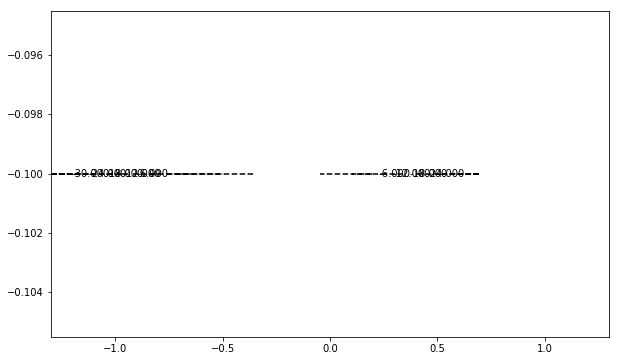

In [27]:
plt.figure(figsize=(10,6))

n = 100
X = np.linspace(-1.3,1.3,n) 
Y = np.linspace(-0.1,-0.1,n) 
X, Y = np.meshgrid(X,Y) 
Z = np.zeros([n, n]) 
for i in range(n):
    for j in range(n):
        Z[i][j] = discriminative((X[i][j],Y[i][j]))
        



plt.contourf(X, Y, Z,[0,0.5], alpha = 0.75, cmap = plt.cm.Accent)

C = plt.contour(X,Y,Z,colors='black', linewidth=8)

# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 10)
#plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)